In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

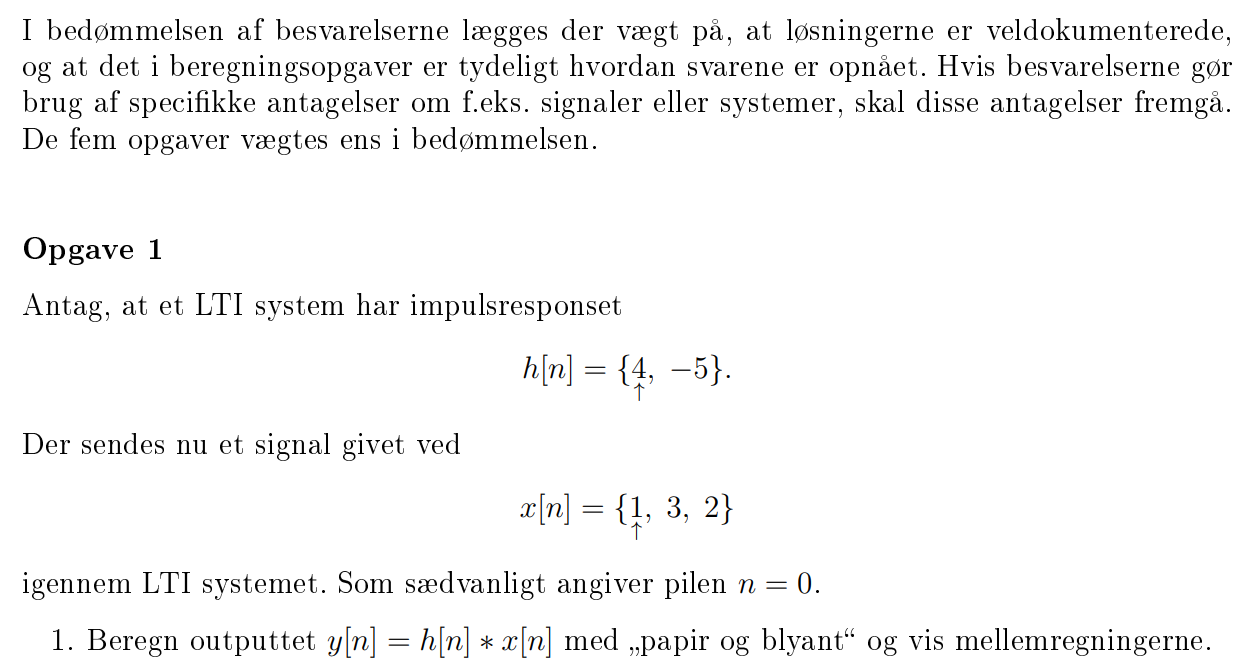

Et LTI system kan findes ved hjælp af impulserespons og et arbitret signal således

\begin{align*}
    y[n]&=x[n]*h[n]
\end{align*}

Hvor foldningen $x[n]$ og $h[n]$ kan findes således

$x[n]*h[h]=\sum _{k=-\infty} ^{+\infty} x[k]\cdot h[n-k]$

Da $x[n]*h[n]=h[n]*x[n]$ vælger jeg at finde x[-n] ved at spejle x[n] over y-aksen.

Dette giver $x[-n]=\{2,3,1\}$ hvor n=0 er i det sidste index hvor $x[-n]=1$

\begin{align*}
y[0]&=4\cdot 1 -5\cdot 0=4\\
y[1]&=4\cdot 3 -5\cdot 1=7\\
y[2]&=4\cdot 2 -5\cdot 3=-7\\
y[3]&=4\cdot 0 -5 \cdot  2 =-10\\
\end{align*}

$$y[n]=\{4,7,-7,-10 \}$$

hvor y[n]=4 er n=0

In [2]:
h=np.array([4.,-5])
x=np.array([1,3,2])
np.convolve(x,h)

array([  4.,   7.,  -7., -10.])

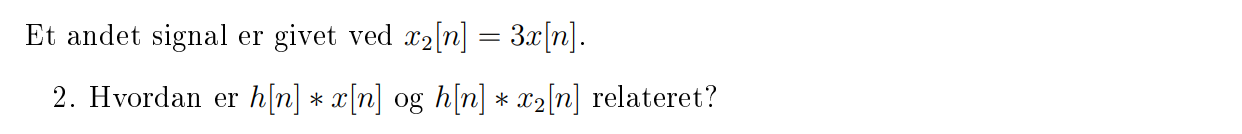

Da der antages at systemet er LTI så må linartitet holde, dette må betyde at  
\begin{align*}
h[n]*x_2[n]=h[n]*3x[n]=3y[n]\\
\end{align*}

In [3]:
x2=3*x
np.convolve(x2,h)

array([ 12.,  21., -21., -30.])

her er det tydeligt at en faktor 3 ganges på $h[n]*x[n]$ når input signalet er $x_2[n]$

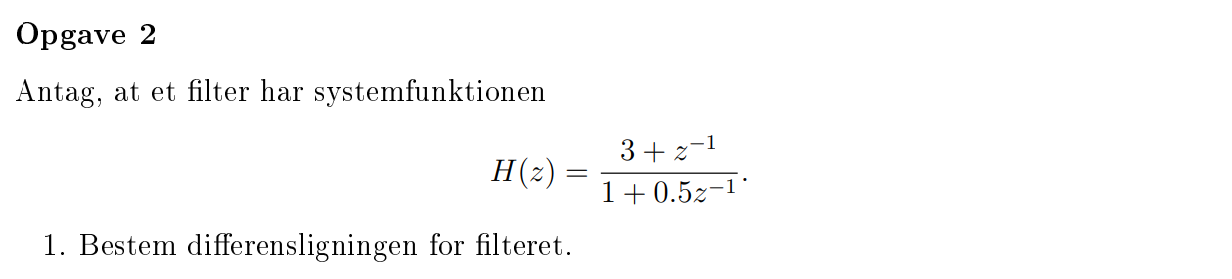

$$H(z)=\frac{3z+1}{z+0.5}$$

Systemsfunktionen er defineret som $H(z)=\frac{Y(z)}{X(z)}$

d.v.s  
  
\begin{align*}
\frac{Y(z)}{X(z)}=\frac{3+z^{-1}}{1+0.5z^{-1}}\\
\frac{Y(z)}{X(z)}\cdot X(z)=\frac{3+z^{-1}}{1+0.5z^{-1}} \cdot X(z)\\
Y(z)=\frac{3+z^{-1}}{1+0.5z^{-1}} \cdot X(z)\\
\end{align*}

Ved brug af tabel 3.2 kan differens ligningen findes:

\begin{align*}
IZT\{Y(z)(1+0.5z^{-1})&=X(z)(3+z^{-1})\}= \\
&y[n]+0.5y[n-1]=3x[n]+x[n-1]\\\\
y[n]+0.5y[n-1]-0.5y[n-1]&=3x[n]+x[n-1]-0.5y[n-1]\\
y[n]&=3x[n]+x[n-1]-0.5y[n-1]
\end{align*}

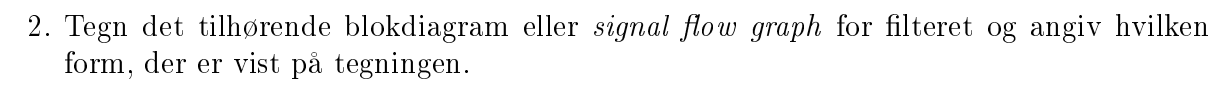

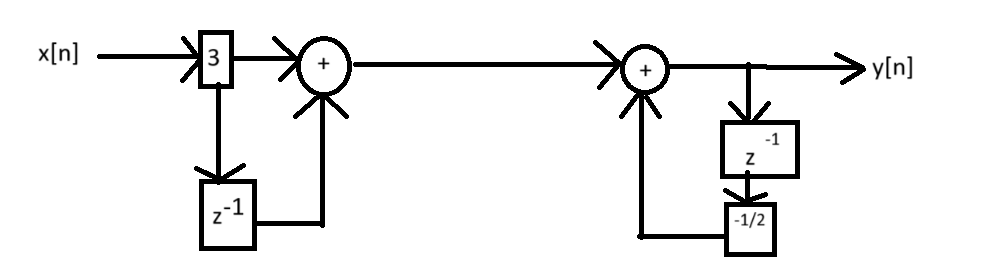

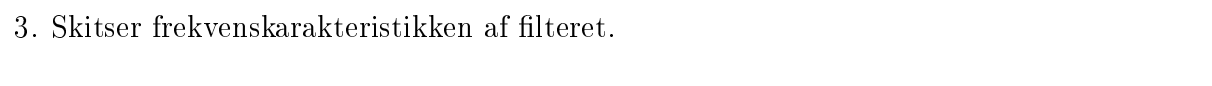

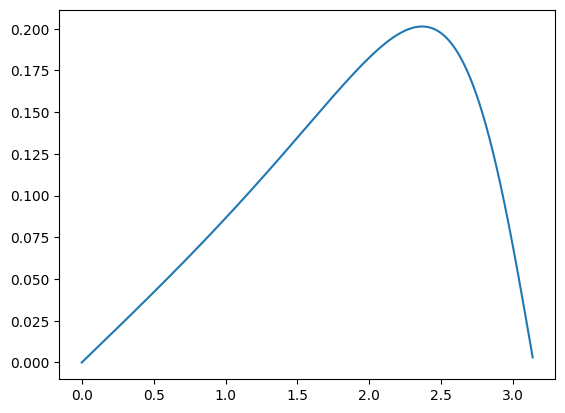

In [4]:
b=np.array([3,1])
a=np.array([1,0.5])
w,h = signal.freqz(b,a)
plt.plot(w,np.angle(h))

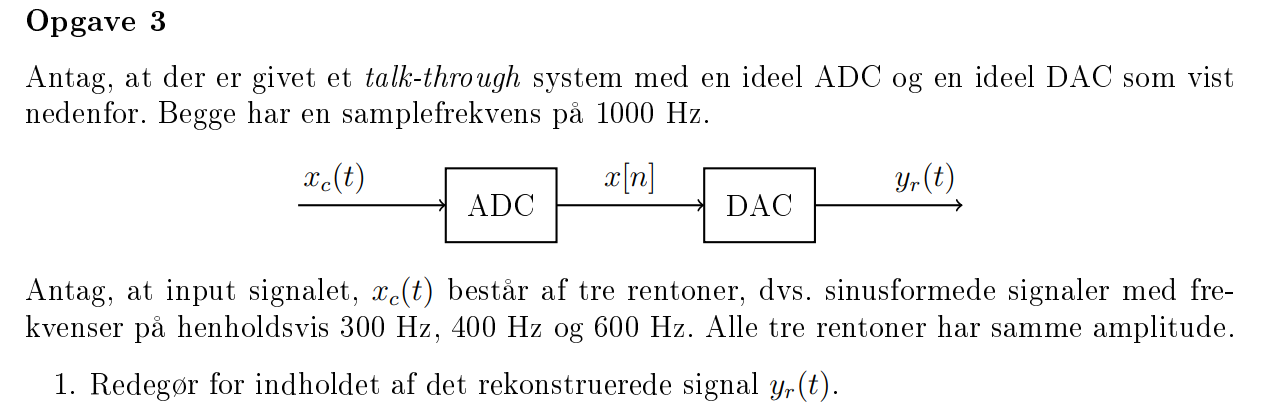

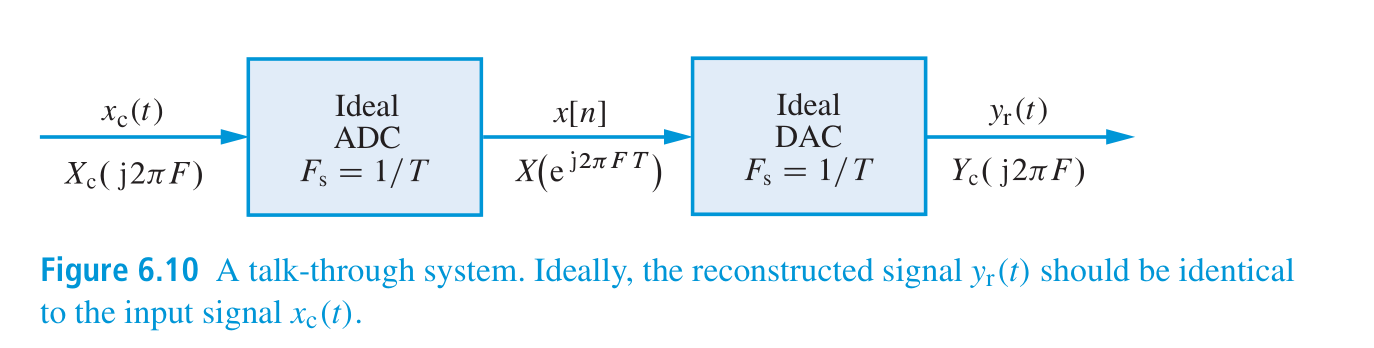

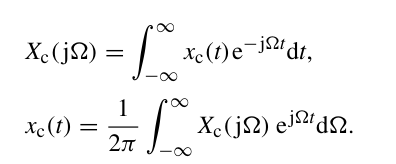

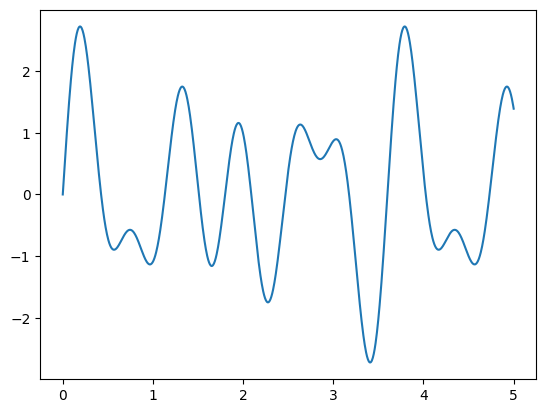

In [5]:
def x_c(t):
    return np.sin(t*np.deg2rad(300))+np.sin(t*np.deg2rad(400))+np.sin(t*np.deg2rad(600))
fs=1000
t=np.linspace(0,5,1000)
plt.plot(t,x_c(t))

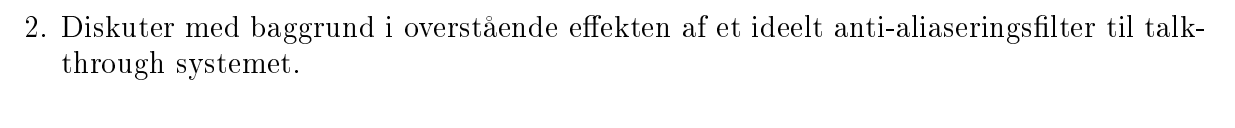

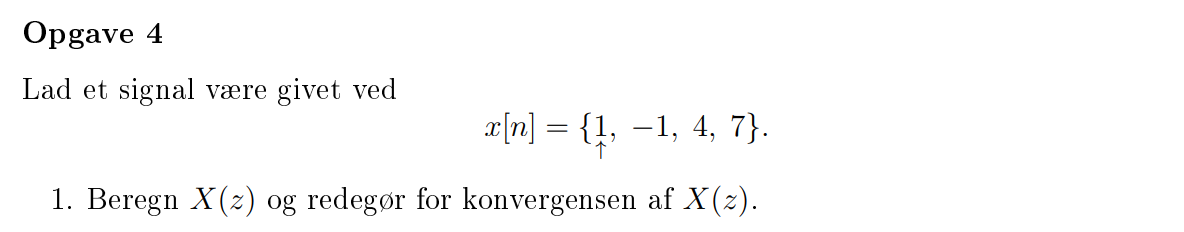

$X(z)$ er givet som $X(z)=\sum _{n=-\infty} ^\infty x[n]z^{-n}$

Da $x[n]$ har længden 4, og index 0 er n=0, så kan X(z) defineres som  
$$X(z)=\sum _{n=0} ^3 x[n]z^{-n}$$

d.v.s $$X(z)=1-z^{-1}+4z^{-2}+7z^{-3}$$

Jeg antager at signalet er causal(da det starter i n=0) og har en finite længde (da der bliver givet 4 punkter), og for dette er }ROC hele z-planen untaget z=0, da $\frac{x}{0}$ er udefineret for $x\in U$

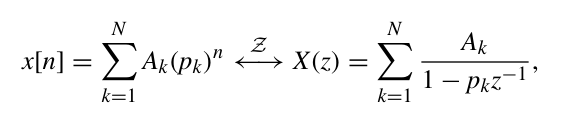

https://www.youtube.com/watch?v=Wbm1_Hf9y2s

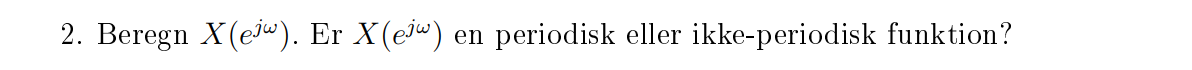

In [6]:
from scipy.fft import fft, ifft
x=np.array([1.,-1,4,7])
X=np.fft.ifft(x)
X

array([ 2.75+0.j, -0.75-2.j, -0.25+0.j, -0.75+2.j])

periodisk per definition?

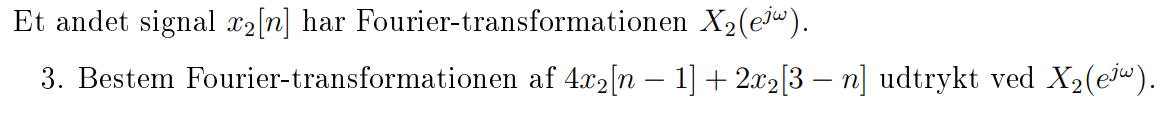

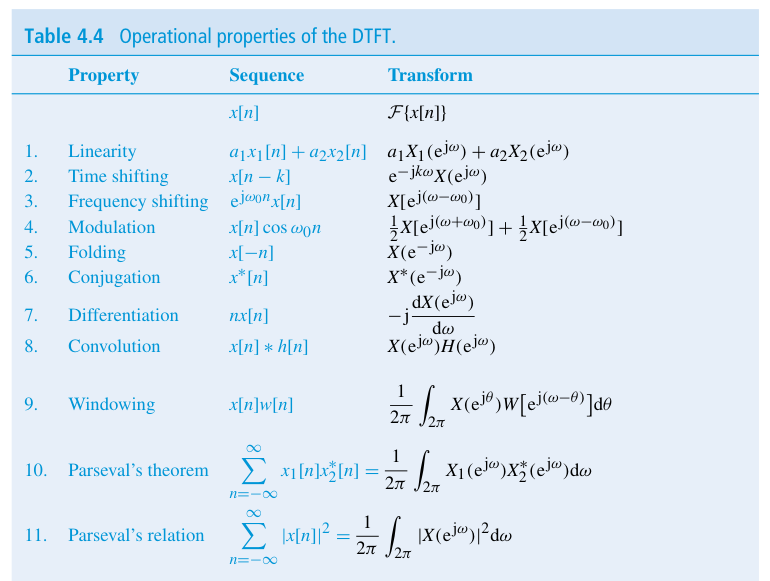

\begin{align*}
DTFT\{4x_2 [n-1]+2x_2 [3-n]\}&=4e^{-jw}X_2(e^{jw})+2e^{3jw}X_2(e^{-jw})\\
\end{align*}

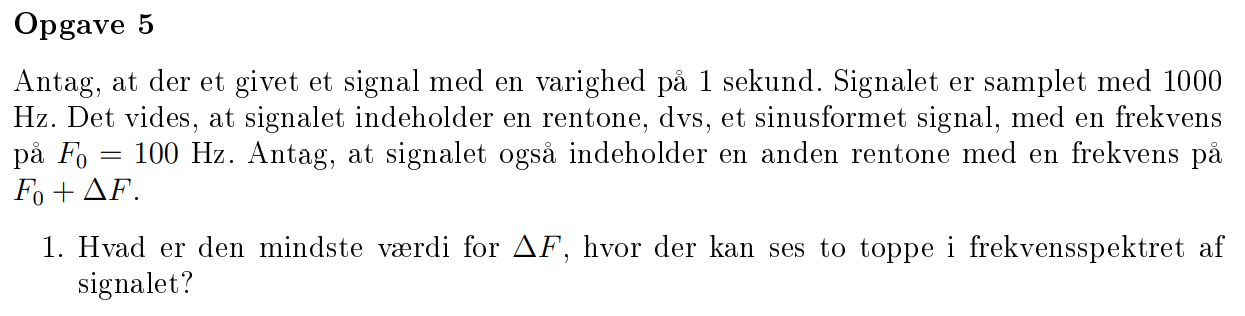

Da $F_s=1000$ og der bliver samplet i 1 sek så er der $\frac{1000}{1}$ samples, d.v.s at der skal være $\frac{1000}{100}=10$ toppe fra rentonen med frekvensen 100Hz.

In [7]:
dt=1
Fs=1000
F_0=100

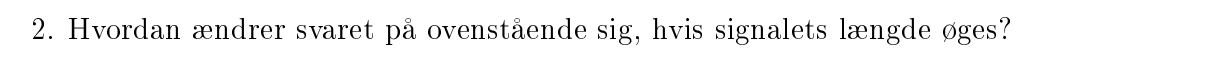

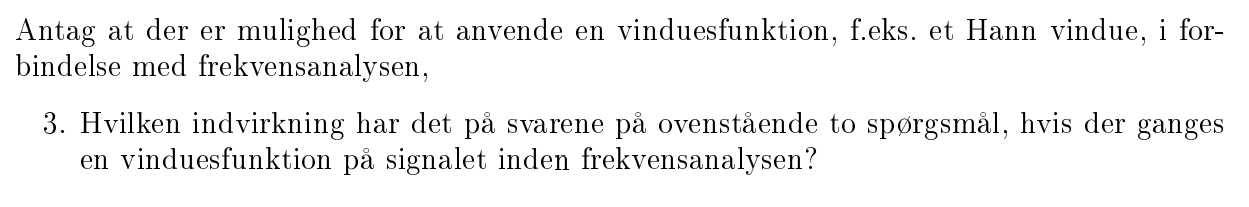